<a href="https://colab.research.google.com/github/Hariom-Gupta/program/blob/master/AI_Stock_LSTM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In this Colab, we will use a keras Long Short-Term Memory (LSTM) model to predict the stock price of Tata Global Beverages


Here are some imports we need to make: numpy for scientific computation, matplotlib for graphing, and pandas for manipulating data.

In [0]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd 

Load training data set with the "Open" and "High" columns to use in our modeling.

In [0]:
#url = 'https://raw.githubusercontent.com/mwitiderrick/stockprice/master/NSE-TATAGLOBAL.csv'
url = "/content/drive/My Drive/Colab Notebooks/INFY.csv"
dataset_train = pd.read_csv(url)
training_set = dataset_train.iloc[:, 1:2].values

Let's take a look at the first five rows of our dataset

In [71]:
dataset_train.head()

,Date,Open,High,Low,Close,Volume
0,2/12/2008,153.000000,153.000000,147.125000,151.044006,12814328
1,3/12/2008,150.500000,152.750000,142.500000,144.569000,17869336
2,4/12/2008,145.000000,149.744003,143.544006,149.050003,11324040
3,5/12/2008,149.000000,149.000000,140.324997,141.811996,12210128
4,8/12/2008,144.399994,148.750000,142.261993,144.718994,23661144


Import MinMaxScaler from scikit-learn to scale our dataset into numbers between 0 and 1 

In [0]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range=(0,1))
training_set_scaled = sc.fit_transform(training_set)

We want our data to be in the form of a 3D array for our LSTM model. First, we create data in 60 timesteps and convert it into an array using NumPy. Then, we convert the data into a 3D array with X_train samples, 60 timestamps, and one feature at each step.

In [0]:
X_train = []
y_train = []
for i in range(60, 2035):
    X_train.append(training_set_scaled[i-60:i, 0])
    y_train.append(training_set_scaled[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)

X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

Make the necessary imports from keras

In [0]:
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dropout
from keras.layers import Dense 

Add LSTM layer along with dropout layers to prevent overfitting. After that, we add a Dense layer that specifies a one unit output. Next, we compile the model using the adam optimizer and set the loss as the mean_squarred_error

In [75]:
model = Sequential()

model.add(LSTM(units=50,return_sequences=True,input_shape=(X_train.shape[1], 1)))
model.add(Dropout(0.2))

model.add(LSTM(units=50,return_sequences=True))
model.add(Dropout(0.2))

model.add(LSTM(units=50,return_sequences=True))
model.add(Dropout(0.2))

model.add(LSTM(units=50))
model.add(Dropout(0.2))

model.add(Dense(units=1))

model.compile(optimizer='adam',loss='mean_squared_error')

model.fit(X_train,y_train,epochs=100,batch_size=32)

Epoch 1/100
1975/1975 [==============================] - 11s 5ms/step - loss: 0.0296
Epoch 2/100
1975/1975 [==============================] - 9s 5ms/step - loss: 0.0059
Epoch 3/100
1975/1975 [==============================] - 9s 5ms/step - loss: 0.0058
Epoch 4/100
1975/1975 [==============================] - 14s 7ms/step - loss: 0.0050
Epoch 5/100
1975/1975 [==============================] - 9s 5ms/step - loss: 0.0050
Epoch 6/100
1975/1975 [==============================] - 10s 5ms/step - loss: 0.0056
Epoch 7/100
1975/1975 [==============================] - 9s 5ms/step - loss: 0.0050
Epoch 8/100
1975/1975 [==============================] - 9s 5ms/step - loss: 0.0044
Epoch 9/100
1975/1975 [==============================] - 9s 5ms/step - loss: 0.0043
Epoch 10/100
1975/1975 [==============================] - 9s 5ms/step - loss: 0.0037
Epoch 11/100
1975/1975 [==============================] - 9s 5ms/step - loss: 0.0040
Epoch 12/100
1975/1975 [==============================] - 9s 5ms/step -

In [0]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


Import the test set for the model to make predictions on 

In [0]:
#url = 'https://raw.githubusercontent.com/mwitiderrick/stockprice/master/tatatest.csv'
url = "/content/drive/My Drive/Colab Notebooks/test.csv"
dataset_test = pd.read_csv(url)

real_stock_price = dataset_test.iloc[:, 1:2].values

Before predicting future stock prices, we have to manipulate the training set; we merge the training set and the test set on the 0 axis, set the time step to 60, use minmaxscaler, and reshape the dataset as done previously. After making predictions, we use inverse_transform to get back the stock prices in normal readable format.


In [77]:
dataset_test.head()

,Date,Open,High,Low,Close,Volume
0,13-12-2019,700.349976,712.900024,700.349976,711.299988,10302412
1,16-12-2019,712.299988,720.200012,710.200012,714.000000,5616324
2,17-12-2019,719.700012,731.250000,715.000000,729.700012,10525565
3,18-12-2019,731.000000,737.299988,722.750000,732.450012,12215295
4,19-12-2019,733.500000,735.950012,724.599976,730.849976,7199210


In [78]:
dataset_total = pd.concat((dataset_train['Open'], dataset_test['Open']), axis = 0)
inputs = dataset_total[len(dataset_total) - len(dataset_test) - 60:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)
X_test = []
for i in range(60, 76):
    X_test.append(inputs[i-60:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
predicted_stock_price = model.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)
print('Done', inputs.size,X_test.size)

Done 158 960


Plot our predicted stock prices and the actual stock price

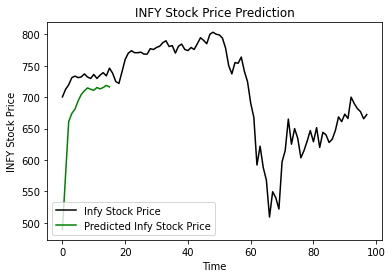

In [79]:
plt.plot(real_stock_price, color = 'black', label = 'Infy Stock Price')
plt.plot(predicted_stock_price, color = 'green', label = 'Predicted Infy Stock Price')
plt.title('INFY Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('INFY Stock Price')
plt.legend()
plt.show()